In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("climate_change.csv")
df=pd.DataFrame(data)
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [5]:
df.shape
df.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [6]:
df.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [7]:
#pearson : standard correlation coefficient(Pair Wise)
df.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


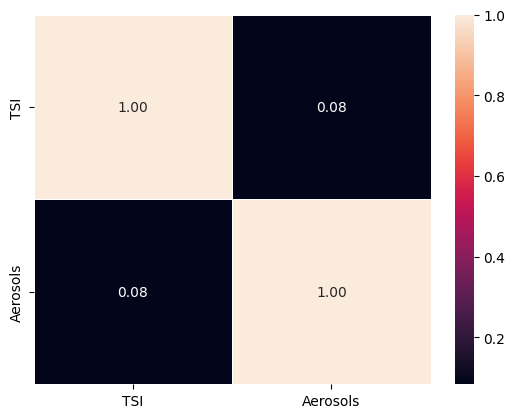

In [8]:
#heatmap
f,ax = plt.subplots()
d=data.iloc[:,8:10]
sns.heatmap(d.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()

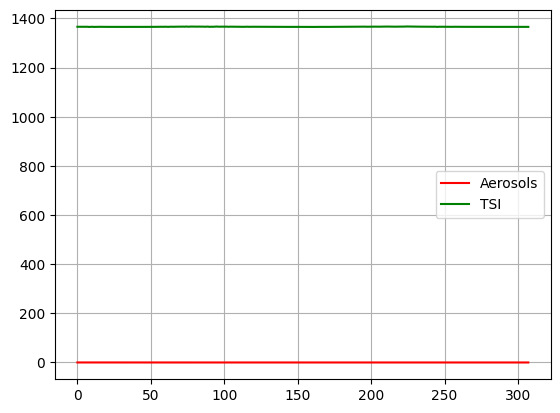

In [9]:
df["Aerosols"].plot(color = 'r',label = "Aerosols")
df["TSI"].plot(color = "g", label = "TSI")
plt.legend()
plt.grid()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,df.columns != 'TSI']
y=df['TSI']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

In [11]:
#LinearRegression
from sklearn.linear_model import LinearRegression
r1 = LinearRegression().fit(x_train,y_train)
y_pred = r1.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

0.06607227660968519


0.5735766472847028

In [12]:
#Lasso
from sklearn.linear_model import Lasso
r2 = Lasso(alpha=1.0).fit(x_train,y_train)
y_pred = r2.predict(x_test)
print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

0.14715298695852608


0.05029048065634567

In [13]:
#Ridge
from sklearn.linear_model import Ridge
r3 = Ridge(alpha=1.0).fit(x_train,y_train)
y_pred = r3.predict(x_test)
print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

0.06921188062494862


0.553313981321248

In [14]:
#ElasticNet
from sklearn.linear_model import ElasticNet
r4 = ElasticNet(alpha=1.0,l1_ratio=0.5).fit(x_train,y_train)
y_pred = r4.predict(x_test)
print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

0.14648066828726083


0.054629552905779866

In [15]:
#Polynmial
from sklearn.preprocessing import PolynomialFeatures
p_f=PolynomialFeatures(degree=2)
ptest=p_f.fit_transform(x_test)
ptrain=p_f.fit_transform(x_train)
r5=LinearRegression().fit(ptrain,y_train)
p_pred=r5.predict(ptest)
print(mean_squared_error(y_test,p_pred))
r2_score(y_test,p_pred)

0.37610684355211144


-1.4273530357382862

In [16]:
#rRandomForest
from sklearn.ensemble import RandomForestRegressor
r6 = RandomForestRegressor(n_estimators = 125).fit(x_train,y_train)
y_pred = r6.predict(x_test)
print(mean_squared_error(y_test,y_pred))
r2_score(y_test,y_pred)

0.03957374412790863


0.7445953202095892